In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle

from keras.models import Sequential, Model
from keras.layers import Conv2D
import os
from keras.applications.vgg16 import VGG16

In [4]:
SIZE_X = 1024
SIZE_Y = 996

In [5]:
train_images = []
image_directory = "images"
images = sorted(os.listdir(image_directory)[:8])
for i, image_name in enumerate(images):
    if image_name.endswith('.jpg'):
        image = cv2.imread(os.path.join(image_directory, image_name), cv2.IMREAD_COLOR)
        image = cv2.resize(image, (SIZE_Y, SIZE_X))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        train_images.append(image)

In [6]:
train_masks = []
mask_directory = "masks"
masks = sorted(os.listdir(mask_directory)[:8])
for i, mask_name in enumerate(masks):
  if mask_name.endswith('.jpg'):
        mask = cv2.imread(os.path.join(mask_directory, mask_name), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)

In [7]:
train_images = np.array(train_images)
train_masks = np.array(train_masks)

In [8]:
X_train = train_images
y_train = train_masks
y_train = np.expand_dims(y_train, axis = 3)

In [9]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [10]:
for layer in VGG_model.layers:
  layer.trainable = False

VGG_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 996, 3)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 1024, 996, 64)  │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 1024, 996, 64)  │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 512, 498, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 512, 498, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 512, 498, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 256, 249, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 256, 249, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 256, 249, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 256, 249, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 128, 124, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 128, 124, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 128, 124, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 128, 124, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 64, 62, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 64, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 64, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 64, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 32, 31, 512)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
new_model = Model(inputs = VGG_model.input, outputs = VGG_model.get_layer('block1_conv2').output)
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 996, 3)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 1024, 996, 64)  │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 1024, 996, 64)  │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 38,720 (151.25 KB)

In [12]:
print(X_train.shape)

(8, 1024, 996, 3)


In [13]:
features = new_model.predict(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


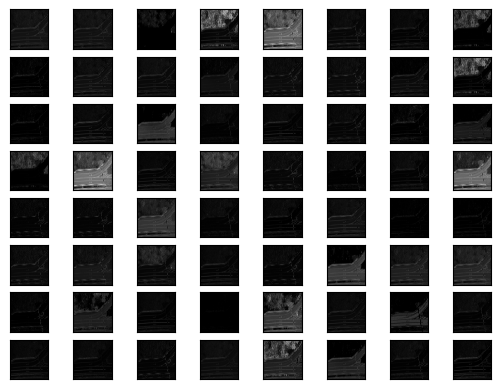

In [14]:
square = 8
ix = 1
for _ in range(square):
  for _ in range(square):
    ax = plt.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(features[0,:,:,ix-1], cmap='gray')
    ix+=1
plt.show()

In [15]:
X = features
X = X.reshape(-1, X.shape[3])

In [16]:
Y = y_train.reshape(-1)

In [17]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
print(dataset['Label'].unique())
print(dataset['Label'].value_counts())

[  0 255 254  57 253   1  72 183   2 248  41  63 237 122 121  22 213 247
 252 149 228  14 246  96 190  97 119  54  16 227  53 244 104  88   3  46
 232 217  52 195 155 191 179  17  69 136 100   6  74 129  84 251 215 226
  23 108 123 138  12 199 207   7 219 218  85  21 171 142 238 148 167  32
  90 231 236  24  86  64 221 216  82 188 152   9 182  87 127 208 225 185
 174 109  33 224 201 184  40 114 151 193  81   8 198 187 107 118 145  43
  29 135 159 249 245  60  56  13 168  80 240 235 180  37  77 223 161 220
 209  48  79 120  61 117 234 242  83  59 112 200 186  42 126  62  55 164
 165  30 203  92   4 229  45 197 111 169  26 103 132 153 139  65 233  20
  73 137  11  27 130  47 177  18  94  15  66  51  25 143 243 210 214 124
 196 206 250 194 162  50 212  10 147 178  98   5 176  39 156  78 175  35
  36 146  34  91 150  67 125 140 158  28 230 134  19 239  38  44 170  49
 157 128 106 102  68 241 131  31 163 160  70 105 166  75  71 192 211 181
 202 133 205 154  89  95 173 115 204  76  93 141 18

In [18]:
dataset = dataset[dataset['Label'] != 0]

In [19]:
X_for_RF = dataset.drop(labels = ['Label'], axis =1)
Y_for_RF = dataset['Label']

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
model.fit(X_for_RF, Y_for_RF)

MemoryError: could not allocate 267386880 bytes

In [ ]:
filename = 'Rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

#### NEW MODEL

In [16]:
from skimage.io import imread, imshow

In [17]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime
import cv2
from PIL import Image
from keras import backend, optimizers

In [18]:
SIZE = 128

In [34]:
import os
from PIL import Image
folder_path = "128_images"

for filename in os.listdir('image_patch'):
    if filename.endswith(".jpg"):
        original_image = Image.open(os.path.join('image_patch', filename))
        resized_image = original_image.resize((SIZE, SIZE))
        resized_image.save(os.path.join(folder_path, filename))

In [35]:
folder_path = "128_masks"

for filename in os.listdir('mask_patch'):
    if filename.endswith(".jpg"):
        original_image = Image.open(os.path.join('mask_patch', filename))
        resized_image = original_image.resize((SIZE, SIZE))
        resized_image.save(os.path.join(folder_path, filename))

In [19]:
image_dataset = []
mask_dataset = []

In [20]:
image_directory = "final_selected_images/selected_images"

images = sorted(os.listdir(image_directory)[:2000])
for i, image_name in enumerate(images):
    if image_name.endswith('.jpg'):
        image = cv2.imread(os.path.join(image_directory, image_name), 1)
        image = Image.fromarray(image)
        image_dataset.append(np.array(image))

In [21]:
mask_directory = "final_selected_images/selected_masks"

masks = sorted(os.listdir(mask_directory)[:2000])
for i, image_name in enumerate(masks):
    if image_name.endswith('.jpg'):
        mask = cv2.imread(os.path.join(mask_directory, image_name), cv2.IMREAD_GRAYSCALE)
        mask = Image.fromarray(mask)
        mask_dataset.append(np.array(mask))

In [22]:
image_dataset = np.array(image_dataset)/255.
mask_dataset = np.expand_dims((np.array(mask_dataset)),1) /255.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 0)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 152, 228, 3),
 (400, 152, 228, 3),
 (1600, 1, 152, 228),
 (400, 1, 152, 228))

In [41]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Activation, Cropping2D, ZeroPadding2D
from tensorflow.keras.models import Model

# Custom Jaccard (IOU) loss function
def jaccard_loss(y_true, y_pred):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    union = K.sum(y_true, axis=-1) + K.sum(y_pred, axis=-1) - intersection
    jaccard = (intersection + 1e-6) / (union + 1e-6)
    return 1 - jaccard

# Build the Attention Residual U-Net model
def attention_residual_unet(input_shape=(152, 228, 3)):
    inputs = Input(shape=input_shape)

    # Encoder
    encoders = []
    x = inputs
    for _ in range(5):
        x = Conv2D(64, 3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        encoders.append(x)
        x = MaxPooling2D(2, strides=2, padding='same')(x)

    # Center
    x = Conv2D(1024, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    # Decoder
    for i in range(5):
        x = UpSampling2D(2)(x)
        enc = encoders[-(i + 1)]
        crop_size = enc.shape[1] - x.shape[1]
        cropping = Cropping2D(cropping=((0, crop_size), (0, 0)))(enc)
        x = Concatenate()([x, cropping])
        x = Conv2D(64, 3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

# Create the model
model = attention_residual_unet()

# Compile the model with Jaccard loss
model.compile(optimizer='adam', loss=jaccard_loss, metrics=['accuracy'])

# Display the model summary
model.summary()


ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 10, 16, 1024), (None, 10, 15, 64)]

In [51]:
import cv2
import numpy as np

# Load the RGB image
image_rgb = cv2.imread('images/1.jpg')

# Extract green and red channels
green_channel = image_rgb[:, :, 1].astype(float)
red_channel = image_rgb[:, :, 2].astype(float)

# Calculate NDVI-like index
ndvi_index = (green_channel - red_channel) / (green_channel + red_channel)

# Normalize NDVI values to the range [0, 255]
ndvi_normalized = ((ndvi_index + 1) / 2) * 255

# Convert to uint8
ndvi_image = ndvi_normalized.astype(np.uint8)

# Threshold to identify green areas
threshold = 120  # Adjust as needed
green_mask = cv2.threshold(ndvi_image, threshold, 255, cv2.THRESH_BINARY)[1]

# Apply the mask to the original RGB image
result_image = cv2.bitwise_and(image_rgb, image_rgb, mask=green_mask)

# Save the resulting image
cv2.imwrite('result_image.jpg', result_image)

# Display the result
cv2.imshow('Green Color Info', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_18408\2829806408.py:12: RuntimeWarning: invalid value encountered in divide
  ndvi_index = (green_channel - red_channel) / (green_channel + red_channel)
C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_18408\2829806408.py:18: RuntimeWarning: invalid value encountered in cast
  ndvi_image = ndvi_normalized.astype(np.uint8)


In [63]:
import cv2
import numpy as np

# Load the RGB image
image_rgb = cv2.imread('images/1.jpg')

# Extract green and red channels
green_channel = image_rgb[:, :, 1].astype(float)
red_channel = image_rgb[:, :, 2].astype(float)

# Calculate NDVI-like index
ndvi_index = (green_channel - red_channel) / (green_channel + red_channel)

# Normalize NDVI values to the range [0, 255]
ndvi_normalized = ((ndvi_index + 1) / 2) * 255

# Convert to uint8
ndvi_image = ndvi_normalized.astype(np.uint8)

# Threshold to identify green areas
threshold = 130  # Adjust as needed
green_mask = cv2.threshold(ndvi_image, threshold, 255, cv2.THRESH_BINARY)[1]

# Apply the mask to the original RGB image
result_image = cv2.bitwise_and(image_rgb, image_rgb, mask=green_mask)

# Save the resulting image
cv2.imwrite('result_image.jpg', result_image)

# Convert BGR to HSV
result_hsv = cv2.cvtColor(result_image, cv2.COLOR_BGR2HSV)

# Increase the hue by a certain value (e.g., 20)
hue_increase = 50  # Adjust as needed
result_hsv[:, :, 0] = (result_hsv[:, :, 0] + hue_increase) % 180

# Convert back to BGR
result_hue_increased = cv2.cvtColor(result_hsv, cv2.COLOR_HSV2BGR)

# Save the image with increased hue
cv2.imwrite('result_image_hue_increased.jpg', result_hue_increased)

# Display the results
cv2.imshow('Original', result_image)
cv2.imshow('Hue Increased', result_hue_increased)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_18408\1630837145.py:12: RuntimeWarning: invalid value encountered in divide
  ndvi_index = (green_channel - red_channel) / (green_channel + red_channel)
C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_18408\1630837145.py:18: RuntimeWarning: invalid value encountered in cast
  ndvi_image = ndvi_normalized.astype(np.uint8)


In [60]:
import cv2
import numpy as np

# Load the original and hue-increased images
original_image = cv2.imread('images/1.jpg')
hue_increased_image = cv2.imread('result_image_hue_increased.jpg')

# Ensure the images have the same dimensions
original_image = cv2.resize(original_image, (hue_increased_image.shape[1], hue_increased_image.shape[0]))

# Subtract pixel values
subtracted_image = cv2.add(hue_increased_image, original_image)

# Save the subtracted image
cv2.imwrite('subtracted_image.jpg', subtracted_image)

# Display the results
cv2.imshow('Original Image', original_image)
cv2.imshow('Hue Increased Image', hue_increased_image)
cv2.imshow('Subtracted Image', subtracted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import numpy as np
import cv2
img = cv2.imread('images/1.jpg')
img2 = img.reshape((-1,3))
from sklearn.mixture import GaussianMixture as GMM
gmm_models = GMM(n_components=25, covariance_type='tied').fit(img2)
gmm_labels = gmm_models.predict(img2)

segmented = gmm_labels.reshape(img.shape[0], img.shape[1])
cv2.imwrite("segmented.jpg", segmented)

MemoryError: Unable to allocate 3.72 GiB for an array with shape (19961856, 25) and data type float64

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img1 = cv2.imread('images/1.jpg')
img = img1[:,:,0]
cv2.imwrite("segmented.jpg", img)
pixels_to_um = 0.454

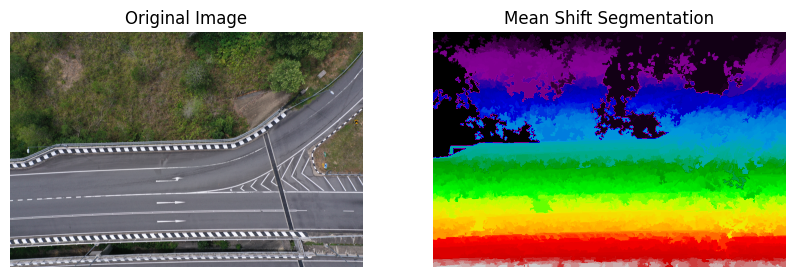

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation, exposure

def mean_shift_segmentation(image_path, spatial_radius=6, range_radius=4.5, min_size=1000):
    # Read the image
    img = io.imread(image_path)

    # Convert the image to the LAB color space
    img_lab = color.rgb2lab(img)

    # Rescale the LAB values to [0, 1] for better Mean Shift performance
    img_lab = exposure.rescale_intensity(img_lab, in_range=(0, 1))

    # Apply Mean Shift segmentation
    labels = segmentation.felzenszwalb(img_lab, scale=spatial_radius, sigma=range_radius, min_size=min_size)

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title('Mean Shift Segmentation')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    # Replace 'your_image.jpg' with the path to your image
    image_path = '1.jpg'

    # Adjust parameters based on your preference
    spatial_radius = 10
    range_radius = 4.5
    min_size = 1000

    mean_shift_segmentation(image_path, spatial_radius, range_radius, min_size)


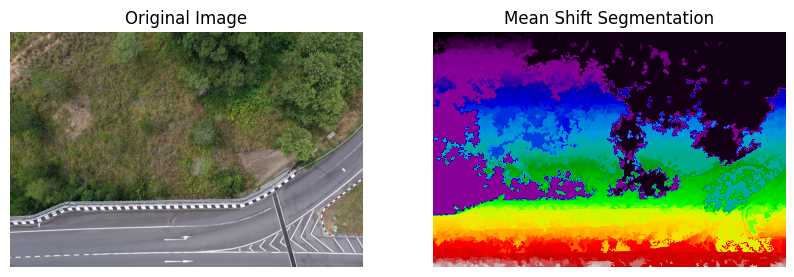

In [24]:
if __name__ == "__main__":
    # Replace 'your_image.jpg' with the path to your image
    image_path = 'images/2.jpg'

    # Adjust parameters based on your preference
    spatial_radius = 10
    range_radius = 3
    min_size = 700

    mean_shift_segmentation(image_path, spatial_radius, range_radius, min_size)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation, exposure, filters, morphology

def preprocess_image(img):
    # Convert the image to the LAB color space
    img_lab = color.rgb2lab(img)

    # Rescale the LAB values to [0, 1] for better Mean Shift performance
    img_lab = exposure.rescale_intensity(img_lab, in_range=(0, 1))

    # Apply Gaussian smoothing to reduce noise
    img_smooth = filters.gaussian(img_lab[:, :, 0], sigma=1.5)

    # Enhance edges using a Sobel filter
    img_edges = filters.sobel(img_smooth)

    # Combine smoothed image and edges to emphasize texture
    img_combined = img_smooth + img_edges

    return img_combined

def postprocess_segmentation(labels, min_grass_area=500):
    # Remove small regions (noise)
    cleaned_labels = morphology.remove_small_objects(labels, min_grass_area)

    return cleaned_labels

def grass_segmentation(image_path, spatial_radius=6, range_radius=4.5, min_size=1000):
    # Read the image
    img = io.imread(image_path)

    # Preprocess the image to enhance features
    img_combined = preprocess_image(img)

    # Apply Mean Shift segmentation
    labels = segmentation.felzenszwalb(img_combined, scale=spatial_radius, sigma=range_radius, min_size=min_size)

    # Post-process segmentation results
    cleaned_labels = postprocess_segmentation(labels)

    # Visualize the segmentation result
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cleaned_labels, cmap='nipy_spectral')
    plt.title('Mean Shift Segmentation (Enhanced)')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    # Replace 'your_image.jpg' with the path to your land image
    image_path = 'images/2.jpg'

    # Adjust parameters based on your preference
    spatial_radius = 6
    range_radius = 4.5
    min_size = 1000

    grass_segmentation(image_path, spatial_radius, range_radius, min_size)


y_train = np.reshape(y_train, (y_train.shape[0],3648 , 5472, 1))
y_test = np.reshape(y_train, (y_train.shape[0],3648 , 5472, 1))

In [26]:
import tensorflow as tf

IMG_WIDTH = 228 #912
IMG_HEIGHT = 152 #608
IMG_CHANNELS = 3

In [27]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 18, 28, 128), (None, 19, 28, 128)]

In [18]:
import tensorflow as tf

def iou_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true + y_pred - y_true * y_pred)
    iou = (intersection + 1e-15) / (union + 1e-15)
    return 1 - iou

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3648,      │          0 │ -                 │
│ (InputLayer)        │ 5472, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 3648,      │          0 │ input_layer[0][0] │
│                     │ 5472, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 3648,      │        448 │ lambda[0][0]      │
│                     │ 5472, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 3648,      │          0 │ conv2d[0][0]      │
│                     │ 5472, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 3648,      │      2,320 │ dropout[0][0]     │
│                     │ 5472, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 1824,      │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 2736, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 1824,      │      4,640 │ max_pooling2d[0]… │
│                     │ 2736, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1824,      │          0 │ conv2d_2[0][0]    │
│                     │ 2736, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 1824,      │      9,248 │ dropout_1[0][0]   │
│                     │ 2736, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 912, 1368, │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 912, 1368, │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 912, 1368, │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 912, 1368, │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 456, 684,  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 456, 684,  │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 456, 684,  │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 456, 684,  │    147,584 │ dropout_3[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('ubd_unet.keras', verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

In [20]:
results = model.fit(X_train,y_train, validation_split = 0.1, batch_size = 16, epochs = 25, callbacks=callbacks)

Epoch 1/25


ResourceExhaustedError: Graph execution error:

Detected at node functional_1_1/dropout_1/stateless_dropout/stateless_random_uniform/StatelessRandomUniformV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 639, in run_forever

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1985, in _run_once

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_9996\1236596516.py", line 1, in <module>

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 323, in fit

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 105, in one_step_on_data

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 56, in train_step

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py", line 816, in __call__

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\operation.py", line 42, in __call__

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 157, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py", line 188, in call

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\function.py", line 153, in _run_through_graph

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py", line 572, in call

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py", line 816, in __call__

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\operation.py", line 42, in __call__

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 157, in error_handler

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\regularization\dropout.py", line 59, in call

  File "c:\Users\sandeep sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\random.py", line 81, in dropout

OOM when allocating tensor with shape[3,3648,5472,16] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node functional_1_1/dropout_1/stateless_dropout/stateless_random_uniform/StatelessRandomUniformV2}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_8462]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


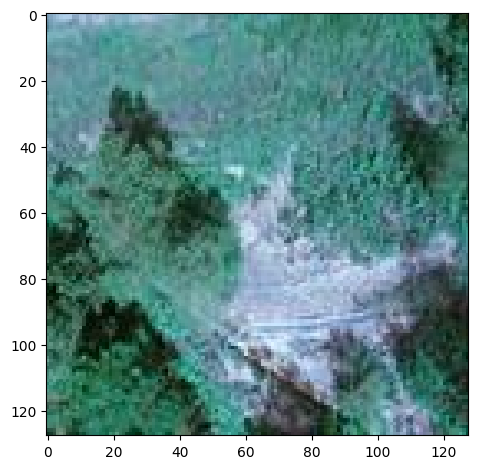

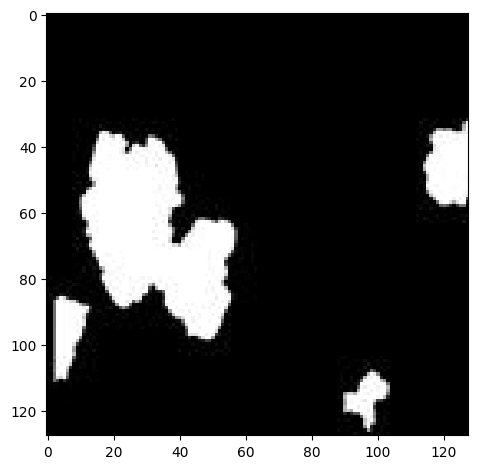

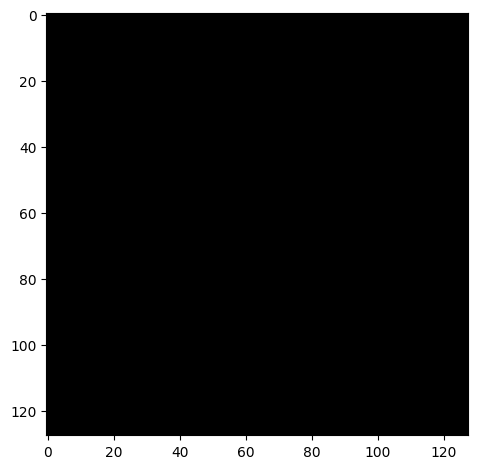

In [ ]:
i = 3
preds = model.predict(np.expand_dims(X_test[i], axis=0), verbose=1)
preds = (preds > 0.5).astype(np.uint8)
imshow(X_test[i])
plt.show()
imshow(np.squeeze(y_test[i]))
plt.show()
imshow(np.squeeze(preds))
plt.show()